In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os 
import math
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from itertools import product

plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading and describing data
df = pd.read_csv('aggregated_df_final01oct2021.csv')
df.describe(include= 'all')

,time,open_x,high_x,low_x,close_x,Basis_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,...,btc_s2f,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral
count,1488,1488.000000,1488.000000,1488.000000,1488.000000,1469.000000,1.488000e+03,1474.000000,1463.000000,1.487000e+03,...,1488.000000,1.488000e+03,1488.000000,1488.000000,1488.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
unique,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14691.645046,15164.850573,14153.097305,14720.756935,14575.538125,3.210472e+07,53.151020,202.328875,1.010305e+08,...,36.472658,5.550080e+04,0.132895,0.352895,0.089066,0.230233,0.129457,0.348837,0.200000,0.091473
std,NaN,14494.863269,14967.645421,13928.197733,14515.367588,14243.105428,6.126127e+07,14.145612,1095.937162,5.868829e+08,...,16.146676,1.064818e+05,0.126408,0.083135,0.062895,0.421145,0.335836,0.476787,0.400155,0.288392
min,NaN,3188.010000,3268.953581,2817.000000,3189.020000,3500.468075,1.799570e+02,10.494657,-5072.114792,-2.322863e+09,...,18.409581,2.827780e+03,-0.367350,0.033333,-0.187500,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6611.015810,6743.491250,6469.037551,6612.410083,6636.765491,5.872377e+05,43.797567,-184.030871,-3.131900e+07,...,24.683816,7.575363e+03,0.062371,0.296959,0.051407,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,8992.422500,9225.881250,8726.426583,9013.879800,9082.240621,3.147183e+06,51.963991,42.926289,1.159403e+05,...,27.773565,1.125902e+04,0.135434,0.341305,0.082179,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,12250.759375,13110.385000,11644.186875,12310.700626,12052.165768,2.643456e+07,62.773309,431.057389,2.695461e+08,...,52.146398,9.349144e+04,0.211749,0.404888,0.122015,0.000000,0.000000,1.000000,0.000000,0.000000


In [3]:
# Setting index and extracting relevant features for time series analysis
df = df.set_index('time')
df = df.iloc[:,0:4]

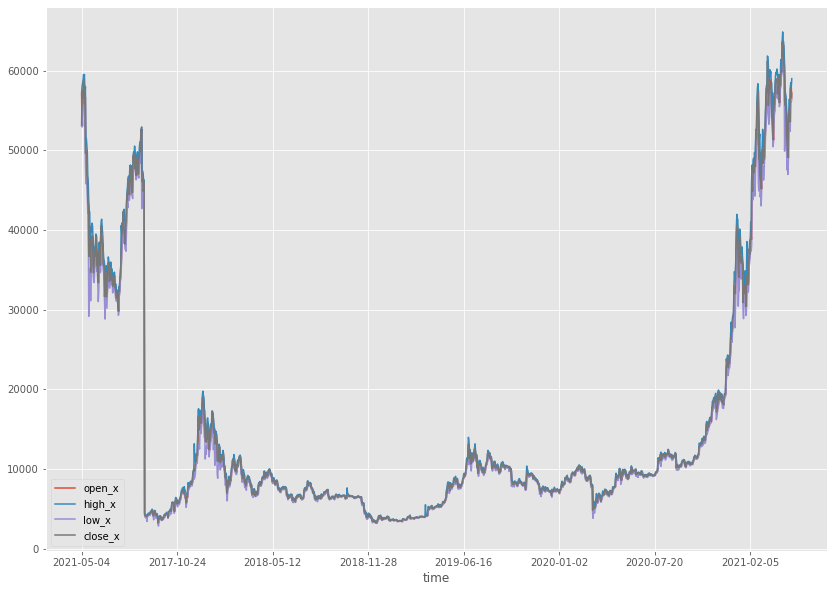

In [4]:
# Plotting movement of OHLC over the period 2017-2021
df.loc[:,df.columns].plot(figsize = (14,10))

In [ ]:
# Plotting movement of OHLC over the period 2017-2021
df.loc[:,df.columns].plot(figsize = (14,10))

plt.figure(figsize=(12,6))
plt.plot(df.close_x, '-', label='Daily')
plt.title('Daily Price Trend', fontsize=24)
plt.grid(linestyle='dashed', linewidth=1)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)

In [5]:
# Converting index to datetime format
df.index = pd.to_datetime(df.index)

In [6]:
# Resampling to daily frequency
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [7]:
df.close_x.isnull().sum()

0

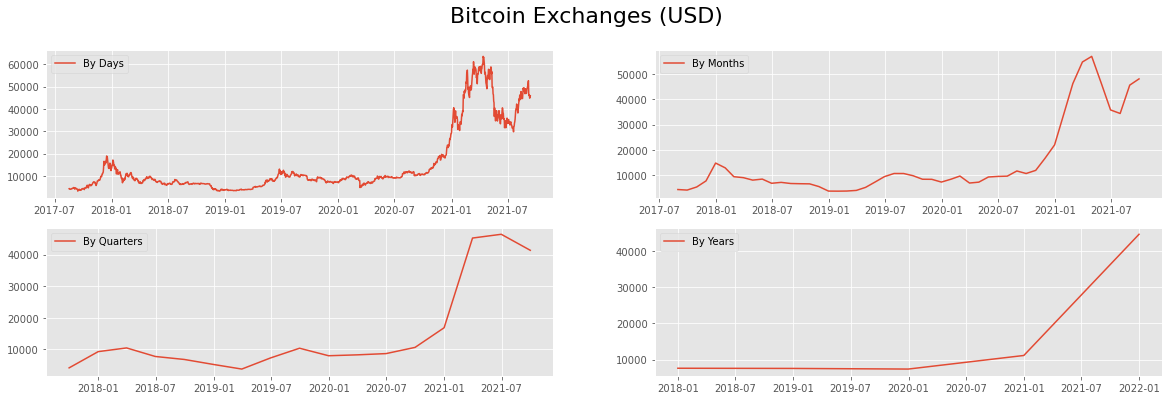

In [8]:
# Plotting subplots of OHLC by days, months, quarters and years
fig = plt.figure(figsize=[20,6])
plt.suptitle('Bitcoin Exchanges (USD)', fontsize=22)

plt.subplot(221)
plt.plot(df.close_x, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.close_x, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.close_x, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.close_x, '-', label='By Years')
plt.legend()

plt.show()

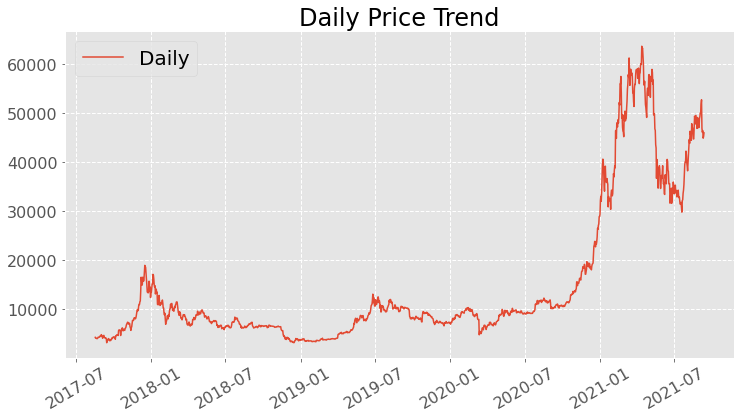

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.close_x, '-', label='Daily')
plt.title('Daily Price Trend', fontsize=24)
plt.grid(linestyle='dashed', linewidth=1)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)

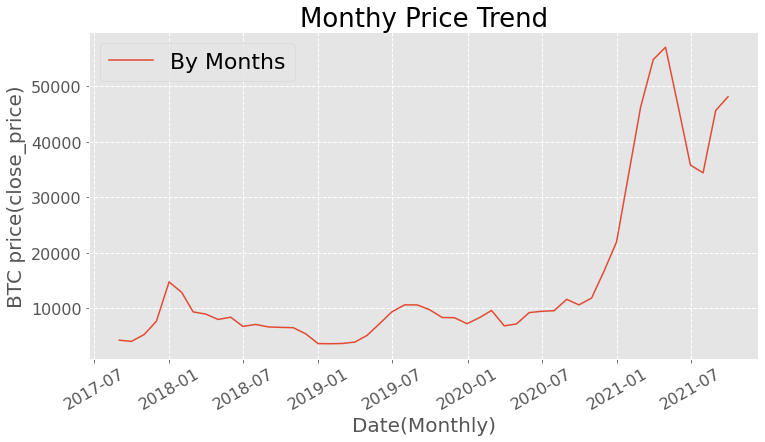

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df_month.close_x, '-', label='By Months')
plt.title('Monthy Price Trend', fontsize=26)
plt.grid(linestyle='dashed', linewidth=1)
plt.xlabel('Date(Monthly)', fontsize=20)
plt.ylabel('BTC price(close_price)', fontsize=20)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)
plt.legend(fontsize=22)

Dickey–Fuller test: p=0.893560


<Figure size 1440x720 with 0 Axes>

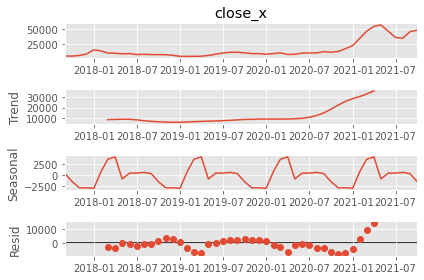

In [25]:
# Checking Stationarity 

plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(df_month.close_x).plot();
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
plt.show()


From the p-value of Dickey-Fuller test, we conclude that the series is not stationary.

Dickey–Fuller test: p=0.308422


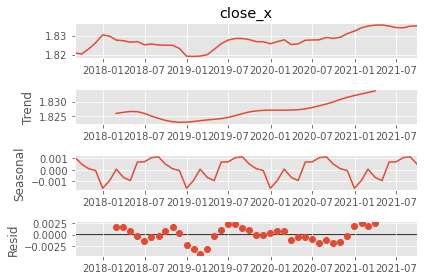

In [26]:
# Box-Cox Transformations

df_month['close_x'], lmbda = stats.boxcox(df_month.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
sm.tsa.seasonal_decompose(df_month.close_x).plot();

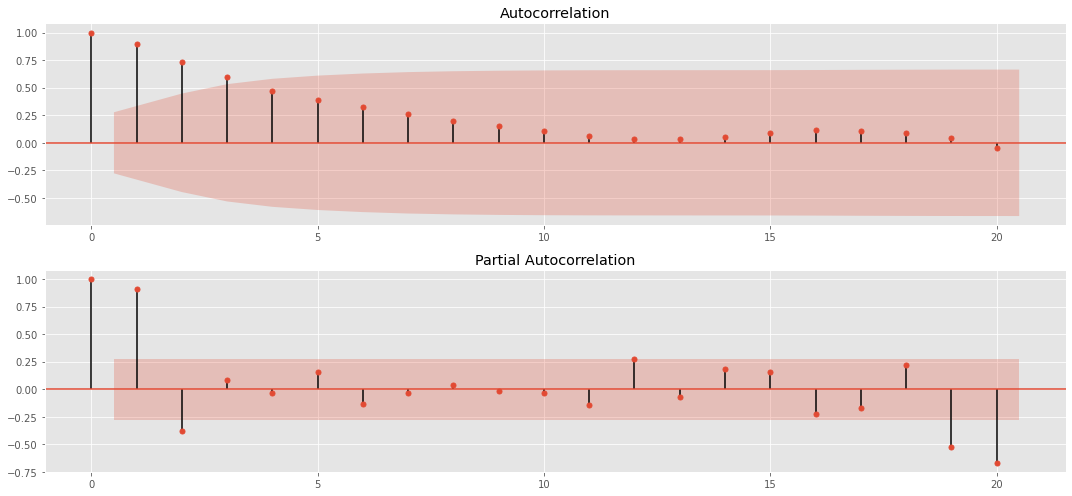

In [27]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots

plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.close_x, lags =20,  ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.close_x, lags =20, ax=ax)
plt.tight_layout()
plt.show()

In [28]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [29]:
df_month.close_x[0:5]

time
2017-08-31    1.820863
2017-09-30    1.820306
2017-10-31    1.823002
2017-11-30    1.826199
2017-12-31    1.830441
Freq: M, Name: close_x, dtype: float64

In [30]:
df_month.close_x.diff()[0:5]

time
2017-08-31         NaN
2017-09-30   -0.000557
2017-10-31    0.002696
2017-11-30    0.003197
2017-12-31    0.004242
Freq: M, Name: close_x, dtype: float64

In [31]:
# Model Selection

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.close_x, enforce_stationarity=False, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [32]:
results

[[(0, 0, 0, 0), -329.9179580401092],
 [(0, 0, 0, 1), nan],
 [(0, 0, 1, 0), -249.86677973966144],
 [(0, 0, 1, 1), nan],
 [(0, 0, 2, 0), -137.86878997957467],
 [(0, 0, 2, 1), nan],
 [(0, 1, 0, 0), -329.4891870182762],
 [(0, 1, 0, 1), -227.8390710914111],
 [(0, 1, 1, 0), -252.91706834693224],
 [(0, 1, 1, 1), nan],
 [(0, 1, 2, 0), -137.60905220534917],
 [(0, 1, 2, 1), -97.23934611054501],
 [(0, 2, 0, 0), -320.26860851176724],
 [(0, 2, 0, 1), -216.15817437743783],
 [(0, 2, 1, 0), -250.79451086654137],
 [(0, 2, 1, 1), nan],
 [(0, 2, 2, 0), -135.9961493392389],
 [(0, 2, 2, 1), -95.68589255078389],
 [(1, 0, 0, 0), -338.360186240149],
 [(1, 0, 0, 1), -237.65448097543805],
 [(1, 0, 1, 0), -241.00351783901232],
 [(1, 0, 1, 1), nan],
 [(1, 0, 2, 0), -126.07624705575367],
 [(1, 0, 2, 1), -88.87294212820008],
 [(1, 1, 0, 0), -328.30407646963937],
 [(1, 1, 0, 1), -225.2676159267341],
 [(1, 1, 1, 0), -239.44025695857061],
 [(1, 1, 1, 1), nan],
 [(1, 1, 2, 0), -124.17780534651988],
 [(1, 1, 2, 1), -86.

In [43]:
df.index.min(), df.index.max()

(Timestamp('2017-08-17 00:00:00', freq='D'),
 Timestamp('2021-09-12 00:00:00', freq='D'))

In [38]:
df.shape

(1488, 4)

In [33]:
# Best Models

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
18  (1, 0, 0, 0) -338.360186
0   (0, 0, 0, 0) -329.917958
6   (0, 1, 0, 0) -329.489187
42  (2, 1, 0, 0) -329.085233
36  (2, 0, 0, 0) -328.728057
                                     SARIMAX Results                                      
Dep. Variable:                            close_x   No. Observations:                   50
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 171.180
Date:                            Sat, 02 Oct 2021   AIC                           -338.360
Time:                                    17:12:48   BIC                           -335.193
Sample:                                08-31-2017   HQIC                          -337.255
                                     - 09-30-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

Dickey–Fuller test:: p=0.010566


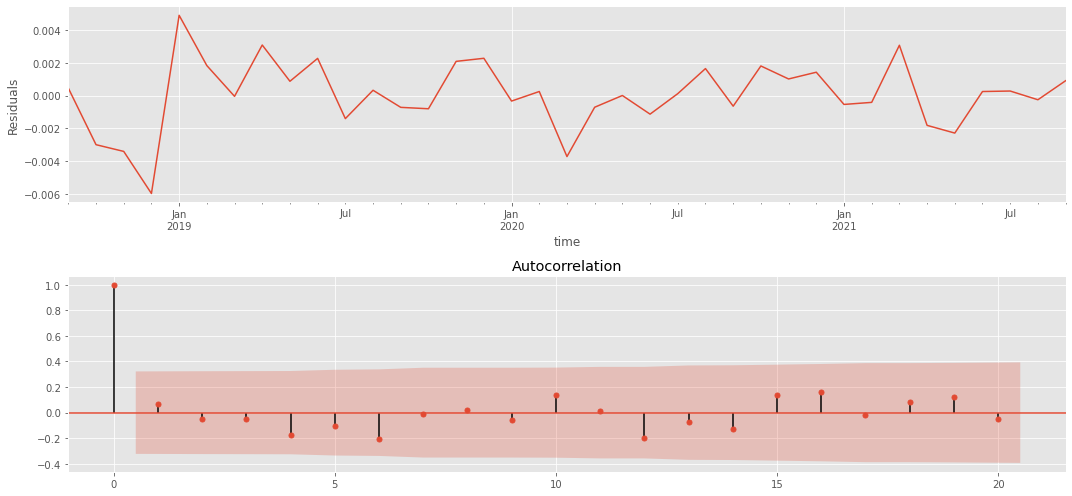

In [34]:
# STL-decomposition

plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

plt.tight_layout()
plt.show()

In [35]:
# Inverse Box-Cox Transformation Function

def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

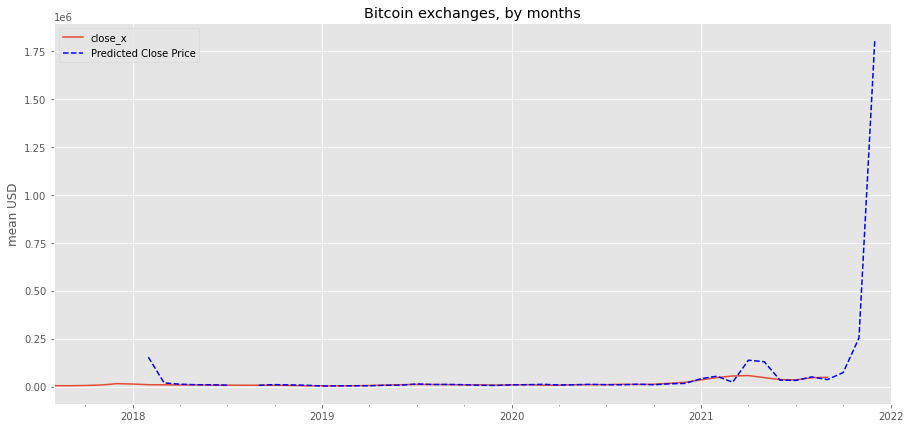

In [36]:
# Prediction

df_month2 = df_month[['close_x']]
df_month2.close_x = df_month2.close_x.apply(lambda x: invboxcox(x, lmbda))
date_list = [datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31),datetime(2022, 1, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.close_x.plot()
df_month2.forecast.plot(color='b', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()


In [37]:
# Evaluation 

df_month3 = df_month2[['close_x','forecast']].dropna()
actual = df_month3['close_x']
pred = df_month3['forecast']
print("Mean Squared Error",mean_squared_error(actual,pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(actual,pred)))

Mean Squared Error 806641262.3282993
Root Mean Squared Error: 28401.43063876007
